In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

plt.style.use("seaborn-dark-palette")

In [2]:
sheet_id = "1n1F0Ah3SfzEdhU2spt0-rQp5TCvebNI4kjy-usNju2U"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

data = pd.read_csv(url)
data.head()

,Nível de renda,Motivação com o curso
0,D,3
1,D,6
2,D,7
3,D,2
4,D,0


### Hipóteses
$H_{NULA}$: A renda familiar do estudante não tem relação com sua motivação com o curso
$H_{PESQ}$ : A renda familiar do estudante tem relação com sua motivação com o curso

##### Calculando a relação entre renda e motivação do curso

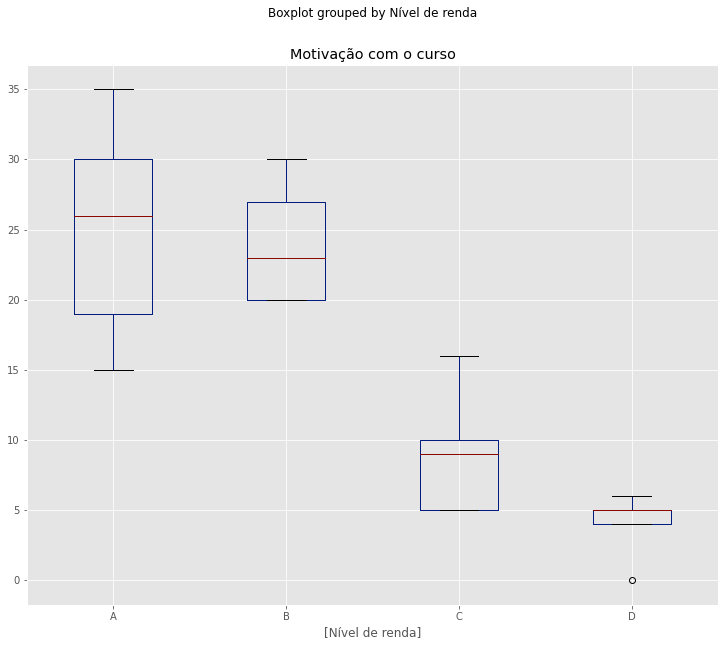

In [34]:
data.boxplot(by="Nível de renda", figsize=(12, 10))
plt.show()

#### F-Test
Primeiro calculamos a média de cada grupo e a média de todos os dados.

Depois aplicamos a formula $\sum(X_{grupo} - \bar{X_{total}})^2$ onde $X_{grupo}$ e a média de cada grupo e $\bar{X_{total}}$ é a média total. Essa é a variação entre os grupos.

Em seguida aplicamos a mesma formula $\sum(X - \bar{X_{grupo}})^2$ para cada um dos grupos, onde $X$ é um valor dentro do grupo e $\bar{X_{grupo}}$ e a média do grupo. Essa é a variação do grupo (teremos uma diferente para cada grupo)

No final calculamos o valor $F$ com a formula $Var_{entre}/Var_{intra}$

intragrupo (dentro do grupo / média do grupo)
entregrupo (entre diferentes grupos /  média total)

In [54]:
def variance(series: pd.Series) -> float:
    sample_mean = series.mean()
    total = 0
    for value in series:
        total += (value - sample_mean) ** 2

    return total

population_mean = data["Motivação com o curso"].mean()
sum_of_within_group_variability = 0
between_group_variability = 0

for group in data["Nível de renda"].unique():
    # within_group_variability, between_group_variability
    group_data = data[data["Nível de renda"] == group]["Motivação com o curso"]
    within_group_variability = variance(group_data)
    sum_of_within_group_variability += within_group_variability
    between_group_variability += (group_data.mean() - population_mean) ** 2


f_value = between_group_variability / sum_of_within_group_variability
print(f_value)

0.759009009009009
